In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing Test and Train data files.
mart_sales_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
mart_sales_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
mart_sales_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#checking the shape of training and testing data
mart_sales_train.shape, mart_sales_test.shape

((8523, 12), (5681, 11))

In [4]:
#checking null values
mart_sales_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
mart_sales_train.isnull().sum()/mart_sales_train.shape[0]*100   

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

We have 17% and 28% null value in item_weight and outlet_size column in mar_sales_train

In [6]:
#checking the info
mart_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The percentage of null in Item_weight column is less just 17% and 11% in train and test so we can impute the null value with mean

In [7]:
#filling the null values 
mart_sales_train['Item_Weight'] =  mart_sales_train['Item_Weight'].fillna(mart_sales_train['Item_Weight'].mean())
mart_sales_test['Item_Weight'] =  mart_sales_test['Item_Weight'].fillna(mart_sales_test['Item_Weight'].mean())

The percentage of null in Outlet_Size column is less just 28% and 18% in train and test and Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [8]:
mart_sales_train['Outlet_Size'] =  mart_sales_train['Outlet_Size'].fillna(mart_sales_train['Outlet_Size'].mode()[0])
mart_sales_test['Outlet_Size'] =  mart_sales_test['Outlet_Size'].fillna(mart_sales_test['Outlet_Size'].mode()[0])

In [9]:
#checking one more timenull values
mart_sales_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
mart_sales_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

We have successfully removed null values from train and test

# Checking outliers

<AxesSubplot:xlabel='Item_Weight'>

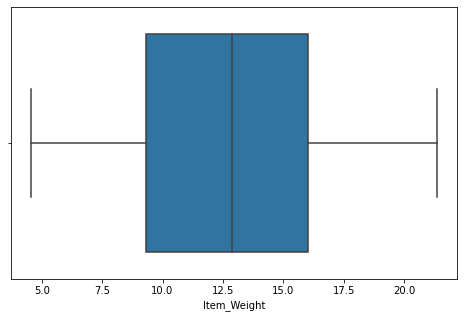

In [11]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x=mart_sales_train['Item_Weight'])

Removing irregularities from Item_Fat_Content column

In [12]:
mart_sales_train['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
mart_sales_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
mart_sales_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [14]:
mart_sales_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


Removing Unwanted columns

In [16]:
mart_sales_train = mart_sales_train.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)
mart_sales_test = mart_sales_test.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)

Encode Categorical Data in both test and train

In [17]:
# Encoding train

from sklearn.preprocessing import LabelEncoder
for col in mart_sales_train.columns:
    if mart_sales_train[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(mart_sales_train[col].values))
        mart_sales_train[col]=lbl.transform(mart_sales_train[col].values)
        
# Encoding test

for coll in mart_sales_test.columns:
    if mart_sales_test[coll].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(mart_sales_test[coll].values))
        mart_sales_test[coll]=lbl.transform(mart_sales_test[coll].values)

In [18]:
mart_sales_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


# Spliting data by train_test_split

In [19]:
x=mart_sales_train.drop('Item_Outlet_Sales',axis=1)
y=mart_sales_train['Item_Outlet_Sales']

# Scaling Data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Training and Testing



In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [39]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)


using LR,KNN,DT,RF,AdaB,GBR algorithms

# Testing with linear regression

In [40]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.5105951012871442

# Testing with KNeighborsRegressor

In [42]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
r2 = r2_score(y_test,y_pred)
r2

0.5612992412263934

# Testing with DecisionTreeRegressor

In [43]:
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.5373350141246752

# Testing with RandomForestRegressor

In [44]:
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.5490796459865921

# Testing with AdaBoostRegressor

In [45]:
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.5422653612382748

# Testing with GradientBoostingRegressor

In [46]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = r2_score(y_test,y_pred)
r6

0.5914711773741286

# Model Results

In [47]:
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting'], 
                 'R Square': [r1, r2, r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.510595
1,KNeighbors,0.561299
2,Decision Tree,0.537335
3,RandomForest,0.549080
4,AdaBoost,0.542265
5,GradientBoosting,0.591471


# Ploting result

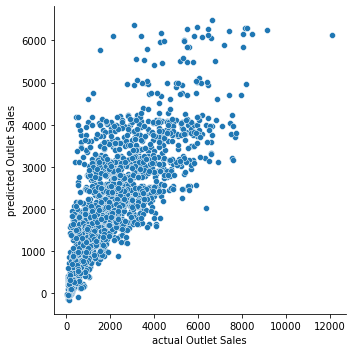

In [48]:
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')